## Color Quantization
***

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import image

from utils import HistogramQuantization, MedianCutQuantization

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
image_name = 'northern_lights'
img = image.imread('images/' + image_name + '.jpg')
w, h, d = orig_shape = tuple(img.shape)
img_arr = np.reshape(img, (w * h, d))

buckets_per_dim = 3
n_cuts = 10

In [17]:
img_arr.shape

(18823680, 3)

In [18]:
HM = HistogramQuantization(buckets_per_dim)

In [19]:
MCM = MedianCutQuantization(4)

In [20]:
hm_quantized_img_arr = HM.fit(img_arr)

In [21]:
mcm_quantized_img_arr = MCM.fit(img, img_arr)

In [22]:
hm_quantized_img = hm_quantized_img_arr.reshape(orig_shape)
mcm_quantized_img = mcm_quantized_img_arr.reshape(orig_shape)

In [23]:
n_cuts

10

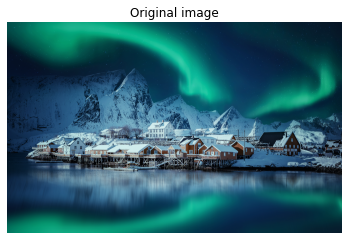

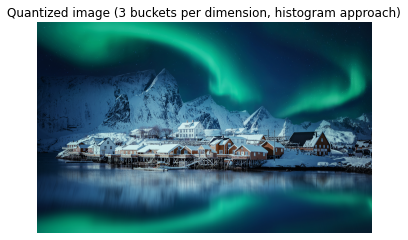

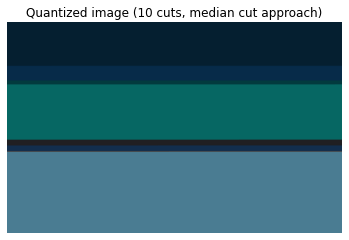

In [24]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image ({} buckets per dimension, histogram approach)'.format(buckets_per_dim))
plt.imsave('images/quantized_images/hm' + image_name + '.jpg', hm_quantized_img)
plt.imshow(hm_quantized_img)

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image ({} cuts, median cut approach)'.format(n_cuts))
plt.imsave('images/quantized_images/mcm' + image_name + '.jpg', mcm_quantized_img)
plt.imshow(mcm_quantized_img)